# ***Understanding `KNN` w.r.t different `Distance metrics`***

---
#### **Before I jump on to KNN or other similar distance dependent algorithms lets first take a moment to understand the various distance metrics.** 
#### **`My objective for creating this notebook is understanding the various distances which we can leverage while working on a usecase because there is no single universal distance metric that can be applied in every problem.`**

---
#### **Notebook Contents**
1. [Libraries Import](Packages_Import)

#### **Packages_Import**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import statsmodels as stm

from sklearn.datasets import load_breast_cancer
from sklearn.neighbors import KNeighborsClassifier, DistanceMetric

%matplotlib inline

#### **CASE-I**
##### **Entire variable as an one row vector**

In [53]:
X = np.array([[1,2,3]])
Y = np.array([[3,4,5]])
X,Y

(array([[1, 2, 3]]), array([[3, 4, 5]]))

In [54]:
X.shape, Y.shape, X.ndim, Y.ndim

((1, 3), (1, 3), 2, 2)

#### **1.1.Euclidean_Distance**

In [55]:
eu_dist = DistanceMetric.get_metric('euclidean')

In [56]:
#Pair-wise distance
eu_dist.pairwise(X,Y)

array([[3.46410162]])

In [57]:
#Reduced distance is squared values in case of Euclidean
eu_dist.dist_to_rdist(X), eu_dist.dist_to_rdist(Y)

(array([[1, 4, 9]], dtype=int32), array([[ 9, 16, 25]], dtype=int32))

In [58]:
#Reduced distance is squared root of values in case of Euclidean
eu_dist.rdist_to_dist(X), eu_dist.rdist_to_dist(Y)

(array([[1.        , 1.41421356, 1.73205081]]),
 array([[1.73205081, 2.        , 2.23606798]]))

#### **1.2.Manhattan_Distance**

In [59]:
man_hat_dist = DistanceMetric.get_metric('manhattan')

In [60]:
man_hat_dist.pairwise(X,Y)

array([[6.]])

In [61]:
#Reduced distance is same values in case of Manhattan
man_hat_dist.dist_to_rdist(X), man_hat_dist.dist_to_rdist(Y)

(array([[1, 2, 3]]), array([[3, 4, 5]]))

In [62]:
#Reduced distance is same values in case of Manhattan
man_hat_dist.rdist_to_dist(X), man_hat_dist.rdist_to_dist(Y)

(array([[1, 2, 3]]), array([[3, 4, 5]]))

#### **CASE-II**
##### **Entire variable as an one column vector**

In [63]:
XX = X.copy().reshape(3,1)
YY = Y.copy().reshape(3,1)

In [64]:
XX,YY

(array([[1],
        [2],
        [3]]),
 array([[3],
        [4],
        [5]]))

#### **2.1.Euclidean_Distance**

In [66]:
eu_dist.pairwise(XX,YY)

array([[2., 3., 4.],
       [1., 2., 3.],
       [0., 1., 2.]])

In [70]:
eu_dist.dist_to_rdist(XX), eu_dist.dist_to_rdist(YY)

(array([[1],
        [4],
        [9]], dtype=int32),
 array([[ 9],
        [16],
        [25]], dtype=int32))

#### **2.2.Euclidean_Distance**

In [67]:
man_hat_dist.pairwise(XX,YY)

array([[2., 3., 4.],
       [1., 2., 3.],
       [0., 1., 2.]])

In [71]:
man_hat_dist.dist_to_rdist(XX), man_hat_dist.dist_to_rdist(YY)

(array([[1],
        [2],
        [3]]),
 array([[3],
        [4],
        [5]]))

#### **CASE-III**
##### **Working with real-valued integer variables**

In [77]:
shoe_size = np.array([7,8,9,10,6,5,7])
body_mass = np.array([23,24,29,35,21,20,25])
shoe_size, body_mass, shoe_size.shape, shoe_size.ndim, body_mass.shape, body_mass.ndim

(array([ 7,  8,  9, 10,  6,  5,  7]),
 array([23, 24, 29, 35, 21, 20, 25]),
 (7,),
 1,
 (7,),
 1)

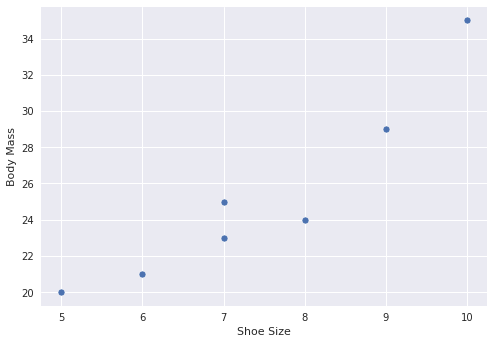

In [80]:
with plt.style.context('seaborn'):
    sns.scatterplot(x=shoe_size,y=body_mass,palette='inferno')
    plt.xlabel('Shoe Size')
    plt.ylabel('Body Mass')

In [81]:
[shoe_size[5],body_mass[5]], [shoe_size[4],body_mass[4]]

([5, 20], [6, 21])

#### **3.1.Euclidean_Distance**

In [82]:
eu_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[1.41421356]])

#### **3.2.Manhattan_Distance**

In [83]:
man_hat_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[2.]])

#### **3.3.Chebyshev_Distance**

In [84]:
chby_dist = DistanceMetric.get_metric('chebyshev')

In [85]:
chby_dist.pairwise([[shoe_size[5],body_mass[5]]], [[shoe_size[4],body_mass[4]]])

array([[1.]])

In [88]:
shoe_size.reshape((1,7)),body_mass.reshape((1,7))

(array([[ 7,  8,  9, 10,  6,  5,  7]]), array([[23, 24, 29, 35, 21, 20, 25]]))

In [86]:
chby_dist.pairwise(shoe_size.reshape((1,7)),body_mass.reshape((1,7))) ## 35 - 10 = 25 that is the max distance

array([[25.]])

#### **3.4.Mahalanobis_Distance**

In [91]:
body_data_df = pd.DataFrame({'shoe_size':shoe_size, 'body_mass':body_mass})

In [93]:
np.square(body_data_df.corr())

,shoe_size,body_mass
shoe_size,1.000000,0.879253
body_mass,0.879253,1.000000


In [87]:
np.square(np.corrcoef(shoe_size,body_mass))

array([[1.       , 0.8792535],
       [0.8792535, 1.       ]])

In [122]:
## Calculating Mahalanobis Distance ::: (X - mu) * inv(cov(X)) * (X - mu).T
x_min_mu = body_data_df - np.mean(body_data_df)
inv_cov_x = pd.DataFrame(scipy.linalg.inv(body_data_df.cov()))
x_min_mu_T = x_min_mu.T

In [113]:
x_min_mu.shape, inv_cov_x.shape, x_min_mu_T.shape

((7, 2), (2, 2), (2, 7))

In [126]:
mahanalobis_dists_matrix = pd.DataFrame(np.dot(np.dot(x_min_mu,inv_cov_x),x_min_mu_T))
mahanalobis_dists_matrix

,0,1,2,3,4,5,6
0,0.416337,0.875584,0.014185,-1.177375,0.287251,-0.171996,-0.243986
1,0.875584,2.705124,0.959986,-1.678823,-0.060287,-1.889828,-0.911756
2,0.014185,0.959986,1.002187,0.818488,-0.705715,-1.651516,-0.437615
3,-1.177375,-1.678823,0.818488,4.065489,-1.425616,-0.924168,0.322005
4,0.287251,-0.060287,-0.705715,-1.425616,0.709262,1.056800,0.138306
5,-0.171996,-1.889828,-1.651516,-0.924168,1.056800,2.774632,0.806076
6,-0.243986,-0.911756,-0.437615,0.322005,0.138306,0.806076,0.326970


In [128]:
np.diagonal(mahanalobis_dists_matrix)

array([0.41633666, 2.70512442, 1.00218689, 4.0654885 , 0.70926178,
       2.77463207, 0.32696968])

#### **CASE-V**

In [144]:
filepath = 'https://raw.githubusercontent.com/selva86/datasets/master/diamonds.csv'
df = pd.read_csv(filepath).iloc[0:500, [0,4,6]]
df.shape, df.ndim, df.head()

((500, 3),
 2,
    carat  depth  price
 0   0.23   61.5    326
 1   0.21   59.8    326
 2   0.23   56.9    327
 3   0.29   62.4    334
 4   0.31   63.3    335)

In [161]:
def mahalanobis(x=None, data=None, cov=None):
    """Compute the Mahalanobis Distance between each row of x and the data  
    x    : vector or matrix of data with, say, p columns.
    data : ndarray of the distribution from which Mahalanobis distance of each observation of x is to be computed.
    cov  : covariance matrix (p x p) of the distribution. If None, will be computed from data.
    """
    x_minus_mu = x - np.mean(data)
    if not cov:
        cov = np.cov(data.values.T)
    inv_covmat = scipy.linalg.inv(cov)
    left_term = np.dot(x_minus_mu, inv_covmat)
    mahal = np.dot(left_term, x_minus_mu.T)
    return mahal.diagonal(), inv_covmat

df_x = df[['carat', 'depth', 'price']].head(500)
df_x['mahala'],VI = mahalanobis(x=df_x, data=df[['carat', 'depth', 'price']])
df_x.head()

,carat,depth,price,mahala
0,0.23,61.5,326,3.766898
1,0.21,59.8,326,5.040171
2,0.23,56.9,327,11.473766
3,0.29,62.4,334,3.876022
4,0.31,63.3,335,4.661105


##### **Understanding the above function**

In [166]:
x_minus_mu = df - np.mean(df)
cov = np.cov(df.values.T)
inv_covmat = scipy.linalg.inv(cov)
left_term = np.dot(x_minus_mu, inv_covmat)
mahal = np.dot(left_term, x_minus_mu.T)

##### **STEP-1**

In [178]:
np.mean(df)

carat       0.63612
depth      61.71280
price    2233.49800
dtype: float64

In [181]:
x_minus_mu.head()

,carat,depth,price
0,-0.40612,-0.2128,-1907.498
1,-0.42612,-1.9128,-1907.498
2,-0.40612,-4.8128,-1906.498
3,-0.34612,0.6872,-1899.498
4,-0.32612,1.5872,-1898.498


In [184]:
pd.DataFrame(df - np.mean(df)).head()

,carat,depth,price
0,-0.40612,-0.2128,-1907.498
1,-0.42612,-1.9128,-1907.498
2,-0.40612,-4.8128,-1906.498
3,-0.34612,0.6872,-1899.498
4,-0.32612,1.5872,-1898.498


##### **STEP-2**

In [186]:
pd.DataFrame(cov)

,0,1,2
0,0.046833,0.022599,197.305744
1,0.022599,2.983724,-5.602980
2,197.305744,-5.602980,993181.561118


In [187]:
df.cov().values

array([[ 4.68330116e-02,  2.25988617e-02,  1.97305744e+02],
       [ 2.25988617e-02,  2.98372361e+00, -5.60298036e+00],
       [ 1.97305744e+02, -5.60298036e+00,  9.93181561e+05]])

In [173]:
df.corr()

,carat,depth,price
carat,1.000000,0.060455,0.914849
depth,0.060455,1.000000,-0.003255
price,0.914849,-0.003255,1.000000


In [175]:
np.corrcoef(df,rowvar=False)

array([[ 1.        ,  0.06045486,  0.91484888],
       [ 0.06045486,  1.        , -0.00325481],
       [ 0.91484888, -0.00325481,  1.        ]])

In [189]:
scipy.linalg.inv(df.cov().values)

array([[ 1.34268725e+02, -1.06705836e+00, -2.66798846e-02],
       [-1.06705836e+00,  3.43635347e-01,  2.13920731e-04],
       [-2.66798846e-02,  2.13920731e-04,  6.30830586e-06]])

In [177]:
inv_covmat

array([[ 1.34268725e+02, -1.06705836e+00, -2.66798846e-02],
       [-1.06705836e+00,  3.43635347e-01,  2.13920731e-04],
       [-2.66798846e-02,  2.13920731e-04,  6.30830586e-06]])

##### **STEP-3**

In [203]:
pd.DataFrame(((df - np.mean(df)).values @ scipy.linalg.inv(df.cov().values)) @ ((df - np.mean(df)).T).values).shape

(500, 500)

In [204]:
pd.DataFrame(((df - np.mean(df)).values @ scipy.linalg.inv(df.cov().values)) @ ((df - np.mean(df)).T).values)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3.766898,3.916408,3.985651,3.509290,3.396797,3.658189,3.682101,3.631782,3.615154,3.852411,...,-1.050648,-0.877226,-0.622280,-1.042334,-1.070403,-1.030892,-0.963937,-0.877226,-0.901139,-1.741025
1,3.916408,5.040171,6.724389,3.101321,2.465016,3.068993,3.374325,3.531883,1.749026,5.185921,...,-1.410516,0.018579,-0.652447,-0.519087,-1.270134,-1.550898,-0.695969,0.018579,-0.286753,-3.158284
2,3.985651,6.724389,11.473766,2.590670,1.152378,1.861321,2.675488,3.354030,-1.915498,7.378499,...,-2.302683,1.250222,-1.827926,0.332080,-1.799468,-2.805898,-0.526231,1.250222,0.436055,-4.643153
3,3.509290,3.101321,2.590670,3.876022,4.122082,3.776873,3.677306,3.664491,4.162841,3.059893,...,-1.102714,-1.610250,-1.599009,-1.351889,-1.127734,-1.077694,-1.356482,-1.610250,-1.510683,-0.159136
4,3.396797,2.465016,1.152378,4.122082,4.661105,4.052604,3.808965,3.714524,5.067003,2.338280,...,-0.959251,-2.134672,-1.774606,-1.635491,-1.053732,-0.864771,-1.546962,-2.134672,-1.891033,0.751059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.030892,-1.550898,-2.805898,-1.077694,-0.864771,-0.577531,-0.770679,-1.059940,0.449597,-1.818682,...,0.841224,0.128070,1.506881,0.086455,0.656987,1.025460,0.484647,0.128070,0.321217,0.229034
496,-0.963937,-0.695969,-0.526231,-1.356482,-1.546962,-1.124048,-1.076651,-1.143898,-1.233603,-0.745033,...,0.459676,0.775041,1.138503,0.504528,0.434705,0.484647,0.617359,0.775041,0.727644,-0.653359
497,-0.877226,0.018579,1.250222,-1.610250,-2.134672,-1.516238,-1.285177,-1.208840,-2.467239,0.113445,...,0.211608,1.338474,1.057637,0.840807,0.295147,0.128070,0.775041,1.338474,1.107413,-1.519558
498,-0.901139,-0.286753,0.436055,-1.510683,-1.891033,-1.321054,-1.175901,-1.178855,-1.866096,-0.270001,...,0.347875,1.107413,1.189201,0.691496,0.374533,0.321217,0.727644,1.107413,0.962261,-1.204418


##### **STEP-4**

In [171]:
mahal.shape

(500, 500)

In [170]:
pd.DataFrame(mahal)

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,3.766898,3.916408,3.985651,3.509290,3.396797,3.658189,3.682101,3.631782,3.615154,3.852411,...,-1.050648,-0.877226,-0.622280,-1.042334,-1.070403,-1.030892,-0.963937,-0.877226,-0.901139,-1.741025
1,3.916408,5.040171,6.724389,3.101321,2.465016,3.068993,3.374325,3.531883,1.749026,5.185921,...,-1.410516,0.018579,-0.652447,-0.519087,-1.270134,-1.550898,-0.695969,0.018579,-0.286753,-3.158284
2,3.985651,6.724389,11.473766,2.590670,1.152378,1.861321,2.675488,3.354030,-1.915498,7.378499,...,-2.302683,1.250222,-1.827926,0.332080,-1.799468,-2.805898,-0.526231,1.250222,0.436055,-4.643153
3,3.509290,3.101321,2.590670,3.876022,4.122082,3.776873,3.677306,3.664491,4.162841,3.059893,...,-1.102714,-1.610250,-1.599009,-1.351889,-1.127734,-1.077694,-1.356482,-1.610250,-1.510683,-0.159136
4,3.396797,2.465016,1.152378,4.122082,4.661105,4.052604,3.808965,3.714524,5.067003,2.338280,...,-0.959251,-2.134672,-1.774606,-1.635491,-1.053732,-0.864771,-1.546962,-2.134672,-1.891033,0.751059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,-1.030892,-1.550898,-2.805898,-1.077694,-0.864771,-0.577531,-0.770679,-1.059940,0.449597,-1.818682,...,0.841224,0.128070,1.506881,0.086455,0.656987,1.025460,0.484647,0.128070,0.321217,0.229034
496,-0.963937,-0.695969,-0.526231,-1.356482,-1.546962,-1.124048,-1.076651,-1.143898,-1.233603,-0.745033,...,0.459676,0.775041,1.138503,0.504528,0.434705,0.484647,0.617359,0.775041,0.727644,-0.653359
497,-0.877226,0.018579,1.250222,-1.610250,-2.134672,-1.516238,-1.285177,-1.208840,-2.467239,0.113445,...,0.211608,1.338474,1.057637,0.840807,0.295147,0.128070,0.775041,1.338474,1.107413,-1.519558
498,-0.901139,-0.286753,0.436055,-1.510683,-1.891033,-1.321054,-1.175901,-1.178855,-1.866096,-0.270001,...,0.347875,1.107413,1.189201,0.691496,0.374533,0.321217,0.727644,1.107413,0.962261,-1.204418


### **So, good here as everything matched!!**

##### **Critical Value**

In [154]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

9.21034037197618

##### **P-Value**

In [156]:
1 - chi2.cdf(12.7,df=2)

0.0017467471362611064

#### **Applying Mahalanobis Distance Metric on Breast Cancer**

In [222]:
cancer = load_breast_cancer()

In [223]:
cancer_df = pd.DataFrame(cancer.data,columns=cancer.feature_names)
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [224]:
y = pd.DataFrame(cancer.target,columns=['Label'])
y.head()

,Label
0,0
1,0
2,0
3,0
4,0


In [226]:
cancer_df = pd.concat([cancer_df,y],axis=1).copy(deep=True)
cancer_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [227]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [230]:
X_train, X_test, y_train, y_test = train_test_split(cancer_df.iloc[:, 0:-1],cancer_df['Label'],test_size=0.40,random_state=42,
                                                    stratify=cancer_df['Label'])

In [231]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((341, 30), (228, 30), (341,), (228,))

#### **Seggregating the positive and negative observations**

##### **Only positivies**

In [281]:
train_df = pd.concat([X_train,y_train],axis=1).copy(deep=True)
train_df_pos = train_df[train_df['Label']==1].copy(deep=True)
train_df_pos.shape

(214, 31)

In [282]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,18.45,63.30,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,22.25,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,19.90,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,31.55,110.20,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,37.16,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1


##### **Only negatives**

In [283]:
train_df_neg = train_df[train_df['Label']==0].copy(deep=True)
train_df_neg.shape

(127, 31)

In [284]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,26.02,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,30.15,105.3,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,30.25,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,17.04,125.0,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,28.07,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0


##### **Distance calculation for positive observations**

In [285]:
train_df_pos_mh_dist = ((train_df_pos.iloc[:,0:-1] - np.mean(train_df_pos.iloc[:,0:-1])).values\
                        @ scipy.linalg.inv(train_df_pos.iloc[:,0:-1].cov().values))\
@ ((train_df_pos.iloc[:,0:-1] - np.mean(train_df_pos.iloc[:,0:-1])).T).values

In [286]:
train_df_pos['mahal_dist'] = train_df_pos_mh_dist.diagonal()

In [287]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,63.30,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1,25.772521
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,90.24,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1,14.048632
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,79.76,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1,15.908549
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,110.20,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1,37.715504
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,82.28,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1,28.900581


##### **Distance calculation for negative observations**

In [288]:
train_df_neg_mh_dist = ((train_df_neg.iloc[:,0:-1] - np.mean(train_df_neg.iloc[:,0:-1])).values\
                        @ scipy.linalg.inv(train_df_neg.iloc[:,0:-1].cov().values))\
@ ((train_df_neg.iloc[:,0:-1] - np.mean(train_df_neg.iloc[:,0:-1])).T).values

In [289]:
train_df_neg['mahal_dist'] = train_df_neg_mh_dist.diagonal()

In [290]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,107.3,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0,30.536895
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,105.3,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0,16.274117
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,102.5,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0,18.579436
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,125.0,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0,23.159218
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,120.4,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0,104.139972


### **Hypothesis Testing**

#### **CASE-I**

#### **Here, first I'll perform the test on positive observations considering the `null hypothesis` as TRUE or POSITIVE and the `alternate hypothesis` as FALSE or negative.**

In [295]:
dof = train_df_pos.iloc[:,0:-1].shape[1]-1
dof

30

In [315]:
c_val = chi2.ppf((1-0.01), df=dof)
c_val

50.89218131151707

In [299]:
train_df_pos['p_val'] = 1 - chi2.cdf(train_df_pos['mahal_dist'], df=dof)

In [300]:
train_df_pos.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist,p_val
525,8.571,13.10,54.53,221.3,0.10360,0.07632,0.025650,0.015100,0.1678,0.07126,...,275.6,0.1641,0.22350,0.175400,0.08512,0.2983,0.10490,1,25.772521,0.686690
58,13.050,19.31,82.61,527.2,0.08060,0.03789,0.000692,0.004167,0.1819,0.05501,...,624.1,0.1021,0.06191,0.001845,0.01111,0.2439,0.06289,1,14.048632,0.994108
342,11.060,14.96,71.49,373.9,0.10330,0.09097,0.053970,0.033410,0.1776,0.06907,...,440.0,0.1418,0.22100,0.229900,0.10750,0.3301,0.09080,1,15.908549,0.983504
413,14.990,22.11,97.53,693.7,0.08515,0.10250,0.068590,0.038760,0.1944,0.05913,...,867.1,0.1077,0.33450,0.311400,0.13080,0.3163,0.09251,1,37.715504,0.157192
559,11.510,23.93,74.52,403.5,0.09261,0.10210,0.111200,0.041050,0.1388,0.06570,...,474.2,0.1298,0.25170,0.363000,0.09653,0.2112,0.08732,1,28.900581,0.522824


In [303]:
train_df_pos.shape

(214, 33)

In [304]:
train_df_pos[train_df_pos['p_val'] < 0.01].shape

(26, 33)

In [308]:
rej_null_hyp = train_df_pos[train_df_pos['p_val'] < 0.01]['mahal_dist'].values
rej_null_hyp

array([ 81.02384852,  72.07114302,  52.08522329,  62.90183841,
        69.0939475 ,  66.10649304,  66.76169799,  76.36211933,
       118.79639287, 145.94310336,  59.52453926,  73.90722389,
        68.33222003,  96.34523381,  54.67357222, 154.13771741,
        76.20390925, 100.12061258,  74.13167215,  58.07212966,
       194.52697533,  54.58637054, 129.41505176,  60.14696292,
        89.70806506,  54.60903334])

In [311]:
rej_null_hyp.min(), rej_null_hyp.max()

(52.085223289182096, 194.5269753331549)

In [325]:
train_df_pos[train_df_pos['p_val'] >= 0.01]['mahal_dist'].min(), train_df_pos[train_df_pos['p_val'] >= 0.01]['mahal_dist'].max()

(6.167006044471601, 50.03579960395341)

#### **So, the null hypothesis got rejected based on the above 26 observations where the mahalanobis distance is greater than the critical value thus the distance ended up in the rejection region.**

#### **CASE-II**

#### **Now, I'll perform the test on negative observations considering the `null hypothesis` as FALSE or NEGATIVE and the `alternate hypothesis` as TRUE or POSITIVE.**

In [317]:
train_df_neg['p_val'] = 1 - chi2.cdf(train_df_neg['mahal_dist'], df=dof)

In [318]:
train_df_neg.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label,mahal_dist,p_val
39,13.48,20.82,88.40,559.2,0.10160,0.12550,0.1063,0.05439,0.1720,0.06419,...,740.4,0.1610,0.4225,0.5030,0.2258,0.2807,0.10710,0,30.536895,4.384197e-01
229,12.83,22.33,85.26,503.2,0.10880,0.17990,0.1695,0.06861,0.2123,0.07254,...,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430,0,16.274117,9.803018e-01
40,13.44,21.58,86.18,563.0,0.08162,0.06031,0.0311,0.02031,0.1784,0.05587,...,787.9,0.1094,0.2043,0.2085,0.1112,0.2994,0.07146,0,18.579436,9.483792e-01
172,15.46,11.89,102.50,736.9,0.12570,0.15550,0.2032,0.10970,0.1966,0.07069,...,1102.0,0.1531,0.3583,0.5830,0.1827,0.3216,0.10100,0,23.159218,8.086583e-01
213,17.42,25.56,114.50,948.0,0.10060,0.11460,0.1682,0.06597,0.1308,0.05866,...,1021.0,0.1243,0.1793,0.2803,0.1099,0.1603,0.06818,0,104.139972,4.075721e-10


In [319]:
train_df_neg.shape

(127, 33)

In [320]:
train_df_neg[train_df_neg['p_val'] < 0.01].shape

(14, 33)

In [321]:
rej_null_hyp_neg = train_df_neg[train_df_neg['p_val'] < 0.01]['mahal_dist'].values
rej_null_hyp_neg

array([104.13997248,  65.26593056,  57.53158832,  74.66179609,
        55.42755962,  79.93825875,  52.30118131,  67.52958184,
        58.82178158,  52.2838042 ,  61.00788787, 102.21571179,
        60.01309311,  70.31700251])

In [322]:
rej_null_hyp_neg.min(), rej_null_hyp_neg.max()

(52.28380420063802, 104.13997248029511)

In [324]:
train_df_neg[train_df_neg['p_val'] >= 0.01]['mahal_dist'].min(), train_df_neg[train_df_neg['p_val'] >= 0.01]['mahal_dist'].max()

(8.361142675252562, 49.68938504959755)

#### **So, the null hypothesis got rejected based on the above 14 observations where the mahalanobis distance is greater than the critical value thus the distance ended up in the rejection region.**

#### **Euclidean Distance :: It performs the pairwise difference and not takes the distribution into account.**

In [79]:
from scipy.spatial.distance import pdist, squareform

In [163]:
distances = pdist(df.iloc[:,:], metric='euclidean')
dist_matrix = pd.DataFrame(squareform(distances))

In [164]:
pd.DataFrame(dist_matrix.iloc[0:5,0])

,0
0,0.000000
1,1.700118
2,4.707441
3,8.050689
4,9.178584


In [165]:
df.head(5)

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


#### **VIF Calculation**

In [345]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif

In [346]:
df.head()

,carat,depth,price
0,0.23,61.5,326
1,0.21,59.8,326
2,0.23,56.9,327
3,0.29,62.4,334
4,0.31,63.3,335


In [350]:
vif_df = pd.DataFrame()
vif_df['Values'] = [vif(df.values,i) for i in range(len(df.columns))]
vif_df['Features'] = df.columns

In [351]:
vif_df

,Values,Features
0,60.169063,carat
1,11.015691,depth
2,37.304660,price


#### **KNN**

In [145]:
knc = KNeighborsClassifier(n_neighbors=5,radius=0.7,weights='distance',algorithm='ball_tree',metric='minkowski')

In [406]:
cancer_df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,Label
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [407]:
knc.fit(cancer_df.iloc[:,0:-1],cancer_df.iloc[:,-1])

KNeighborsClassifier(algorithm='kd_tree', weights='distance')

In [408]:
knc.predict(cancer_df.iloc[:,0:-1])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,